In [1]:
import skimage.io
from skimage import filters
from skimage.color import rgb2gray
from skimage import exposure
from skimage.morphology import disk
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
img_data = dict()

def plot_images(img_1, img_2, img_3, binary=False, title=None):
    
    fig, axs = plt.subplots(1, 3, figsize=(12,12))
    
    if binary:
        cmap = cm.binary
    else:
        cmap = None
        
    axs[0].imshow(img_1, cmap=cmap)
    axs[1].imshow(img_2, cmap=cmap)
    axs[2].imshow(img_3, cmap=cmap)
    
    if title is not None:
        fig.suptitle(title, fontsize=16)
        fig.tight_layout()
        fig.subplots_adjust(top=1.6)
    
    return

# Load Images

In [3]:
img_1 = skimage.io.imread(fname="img-1.png")
img_2 = skimage.io.imread(fname="img-2.png")
img_3 = skimage.io.imread(fname="img-3.png")

In [4]:
img_data["Original"] = [img_1, img_2, img_3]

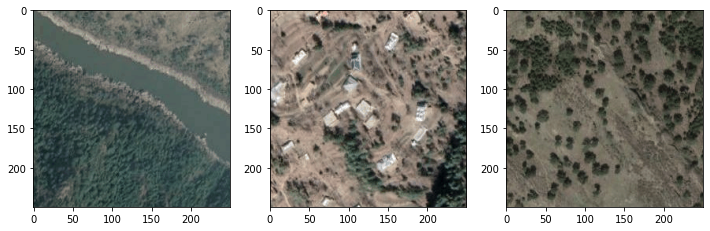

In [5]:
plot_images(img_1, img_2, img_3)

# Sobel Filter

In [6]:
img_1_sobel = filters.sobel(img_1)
img_2_sobel = filters.sobel(img_2)
img_3_sobel = filters.sobel(img_3)

In [7]:
img_data["Sobel"] = [img_1_sobel, img_2_sobel, img_3_sobel]

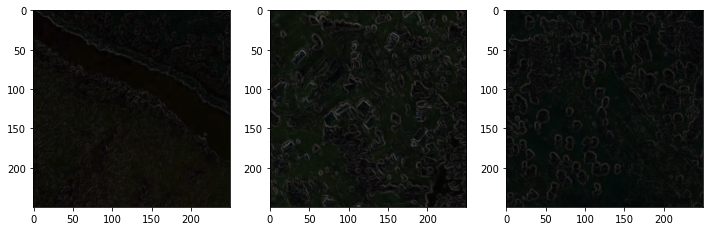

In [8]:
plot_images(img_1_sobel, img_2_sobel, img_3_sobel)

# Prewwit Filter

In [9]:
img_1_prewwit = filters.prewitt(img_1)
img_2_prewwit = filters.prewitt(img_2)
img_3_prewwit = filters.prewitt(img_3)

In [10]:
img_data["Prewwit"] = [img_1_prewwit, img_2_prewwit, img_3_prewwit]

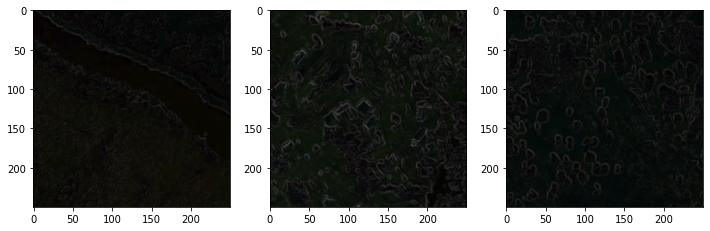

In [11]:
plot_images(img_1_prewwit, img_2_prewwit, img_3_prewwit)

# Roberts Filter

In [12]:
img_1_gray = rgb2gray(img_1)
img_2_gray = rgb2gray(img_2)
img_3_gray = rgb2gray(img_3)

In [13]:
img_data["Gray"] = [img_1_gray, img_2_gray, img_3_gray]

In [14]:
img_1_roberts = filters.roberts(img_1_gray)
img_2_roberts = filters.roberts(img_2_gray)
img_3_roberts = filters.roberts(img_3_gray)

In [15]:
img_data["Roberts"] = [img_1_roberts, img_2_roberts, img_3_roberts]

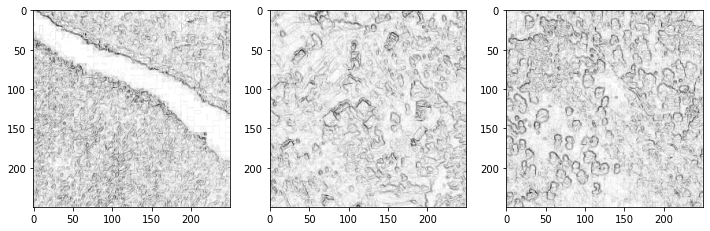

In [16]:
plot_images(img_1_roberts, img_2_roberts, img_3_roberts, binary=True)

# Laplace Filter

In [17]:
img_1_laplace = filters.laplace(img_1)
img_2_laplace = filters.laplace(img_2)
img_3_laplace = filters.laplace(img_3)

In [18]:
img_data["Laplace"] = [img_1_laplace, img_2_laplace, img_3_laplace]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


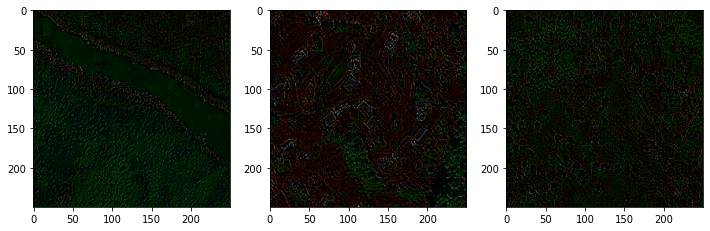

In [19]:
plot_images(img_1_laplace, img_2_laplace, img_3_laplace)

# Gaussian Filter

In [20]:
img_1_gaussian = filters.gaussian(img_1)
img_2_gaussian = filters.gaussian(img_2)
img_3_gaussian = filters.gaussian(img_3)

<ipython-input-20-dd7ca102eb23>:1: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  img_1_gaussian = filters.gaussian(img_1)
<ipython-input-20-dd7ca102eb23>:2: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  img_2_gaussian = filters.gaussian(img_2)
<ipython-input-20-dd7ca102eb23>:3: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  img_3_gaussian = filters.gaussian(img_3)


In [21]:
img_data["Gaussian"] = [img_1_gaussian, img_2_gaussian, img_3_gaussian]

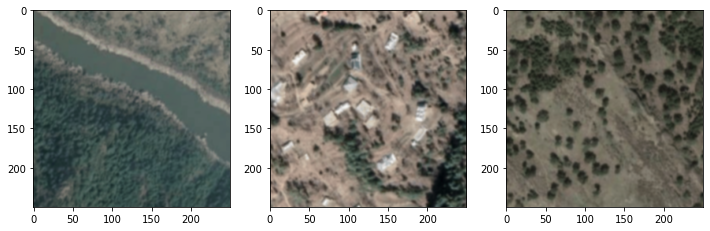

In [22]:
plot_images(img_1_gaussian, img_2_gaussian, img_3_gaussian)

# Difference of Gaussians Filter

In [23]:
img_1_dog = filters.difference_of_gaussians(img_1,2,10)
img_2_dog = filters.difference_of_gaussians(img_2,2,10)
img_3_dog = filters.difference_of_gaussians(img_3,2,10)

In [24]:
img_data["Difference of Gaussian"] = [img_1_dog, img_2_dog, img_3_dog]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


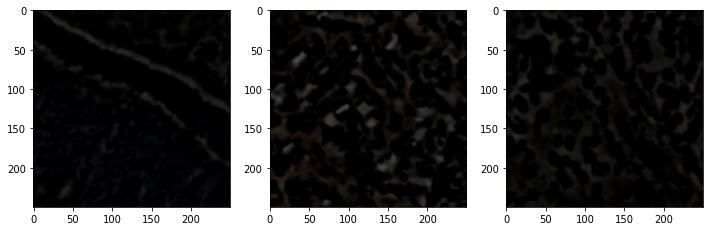

In [25]:
plot_images(img_1_dog, img_2_dog, img_3_dog)

# Sharpening Filter

In [26]:
img_1_sharp = filters.unsharp_mask(img_1, amount=5)
img_2_sharp = filters.unsharp_mask(img_2, amount=5)
img_3_sharp = filters.unsharp_mask(img_3, amount=5)

In [27]:
img_data["Sharpened"] = [img_1_sharp, img_2_sharp, img_3_sharp]

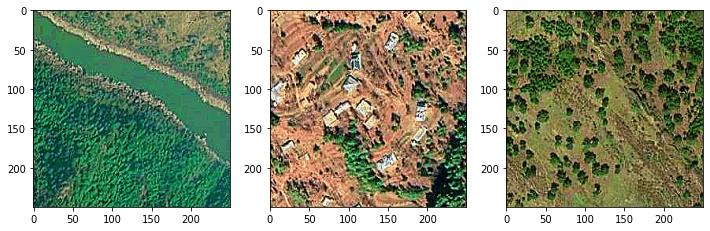

In [28]:
plot_images(img_1_sharp, img_2_sharp, img_3_sharp)

# Histogram Equalization - global

In [29]:
img_1_histeq_g = exposure.equalize_hist(img_1)
img_2_histeq_g = exposure.equalize_hist(img_2)
img_3_histeq_g = exposure.equalize_hist(img_3)

/home/ali/Desktop/SDTM/SDTM_env/lib/python3.8/site-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


In [30]:
img_data["Histogram Equalization Global"] = [img_1_histeq_g, img_2_histeq_g, img_3_histeq_g]

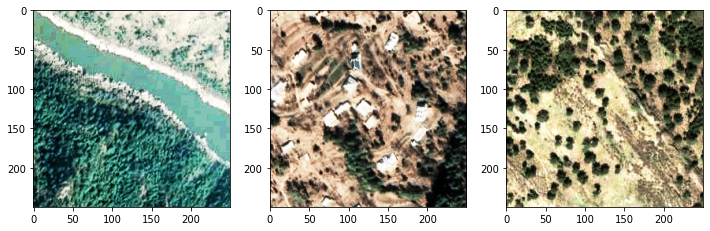

In [31]:
plot_images(img_1_histeq_g,img_2_histeq_g,img_3_histeq_g)

# Histogram Equalization - local

In [32]:
selem = disk(30)
img_1_histeq_l = filters.rank.equalize(img_1_gray, selem=selem)
img_2_histeq_l = filters.rank.equalize(img_2_gray, selem=selem)
img_3_histeq_l = filters.rank.equalize(img_3_gray, selem=selem)

/home/ali/Desktop/SDTM/SDTM_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [33]:
img_data["Histogram Equalization Local"] = [img_1_histeq_l, img_2_histeq_l, img_3_histeq_l]

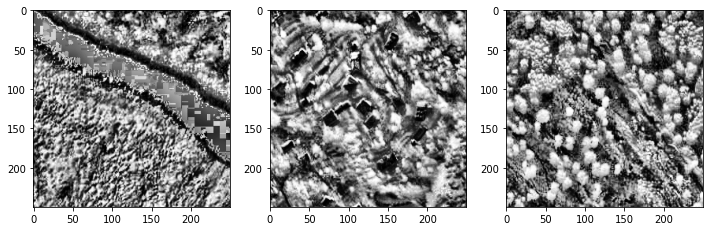

In [34]:
plot_images(img_1_histeq_l,img_2_histeq_l,img_3_histeq_l, binary=True)

# Mean Shift Algorithm

In [35]:
img_1_flat = np.reshape(img_1, [-1, 3])
bandwidth = estimate_bandwidth(img_1_flat, quantile=.04, n_samples=1000)
ms = MeanShift(bandwidth, bin_seeding=True)
ms.fit(img_1_flat)
img_1_flat_ms = ms.labels_
img_1_ms = np.reshape(img_1_flat_ms, [250,250])

img_2_flat = np.reshape(img_2, [-1, 3])
bandwidth = estimate_bandwidth(img_2_flat, quantile=.04, n_samples=1000)
ms = MeanShift(bandwidth, bin_seeding=True)
ms.fit(img_2_flat)
img_2_flat_ms = ms.labels_
img_2_ms = np.reshape(img_2_flat_ms, [250,250])

img_3_flat = np.reshape(img_3, [-1, 3])
bandwidth = estimate_bandwidth(img_3_flat, quantile=.04, n_samples=1000)
ms = MeanShift(bandwidth, bin_seeding=True)
ms.fit(img_3_flat)
img_3_flat_ms = ms.labels_
img_3_ms = np.reshape(img_3_flat_ms, [250,250])

/home/ali/Desktop/SDTM/SDTM_env/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass bandwidth=7.454845566743044 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/ali/Desktop/SDTM/SDTM_env/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass bandwidth=12.429616081534183 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/ali/Desktop/SDTM/SDTM_env/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass bandwidth=6.467878943612214 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [36]:
img_data["Mean Shift Algorithm"] = [img_1_ms, img_2_ms, img_3_ms]

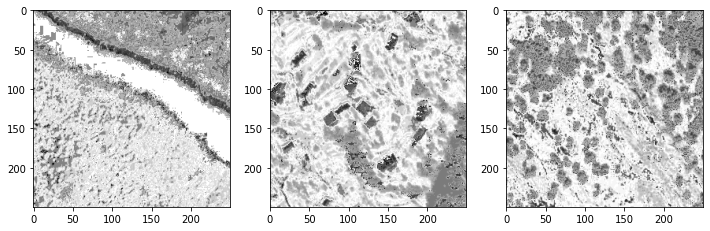

In [37]:
plot_images(img_1_ms, img_2_ms, img_3_ms, binary=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


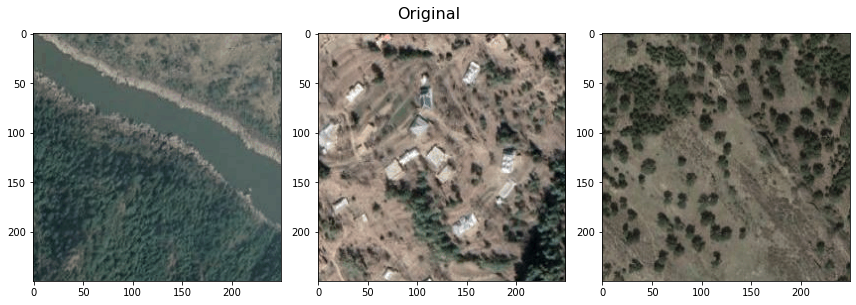

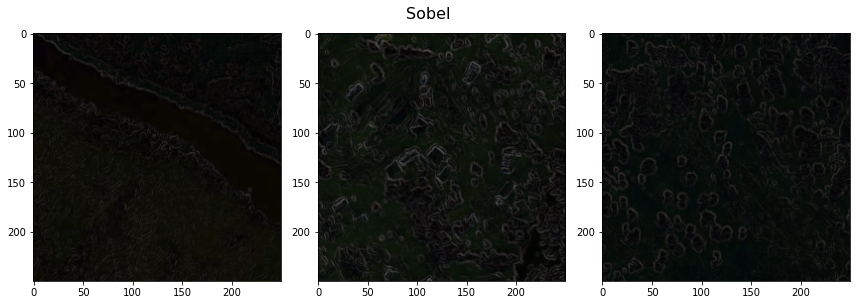

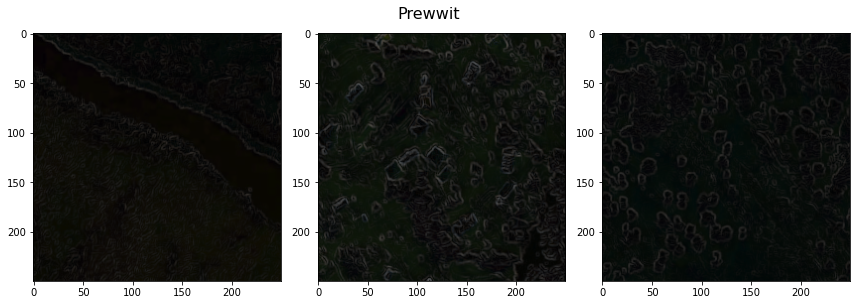

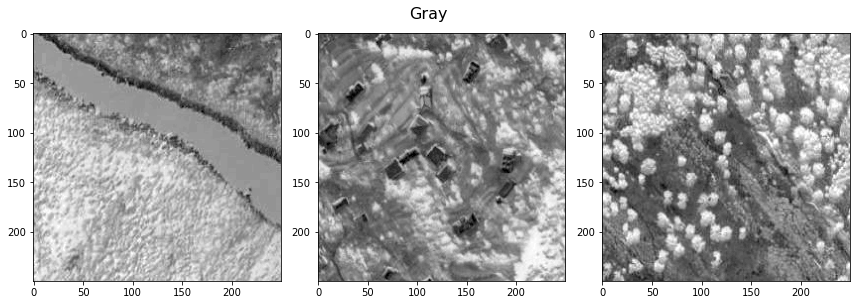

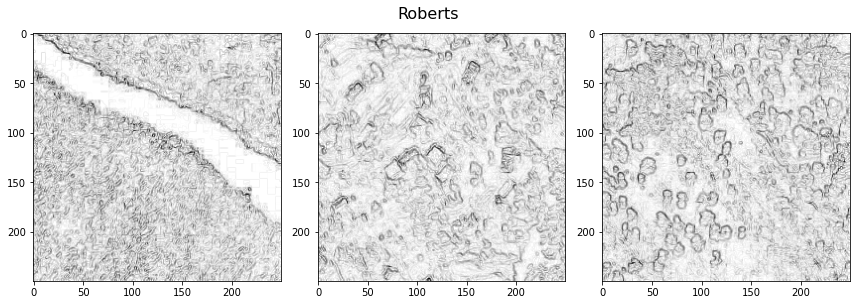

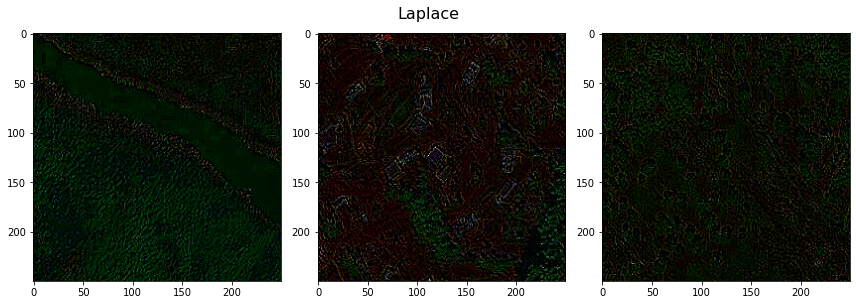

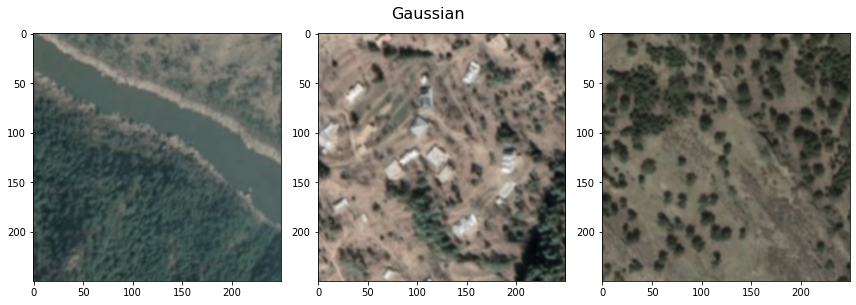

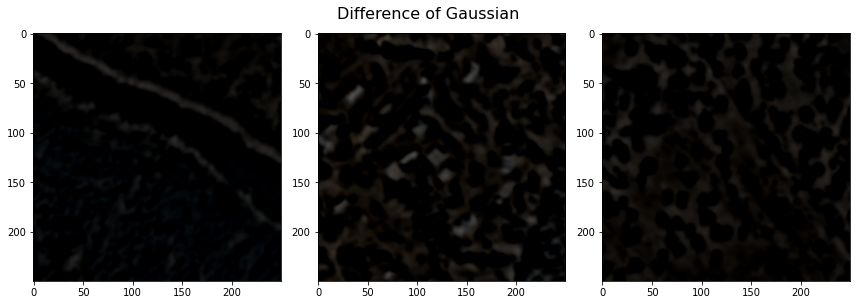

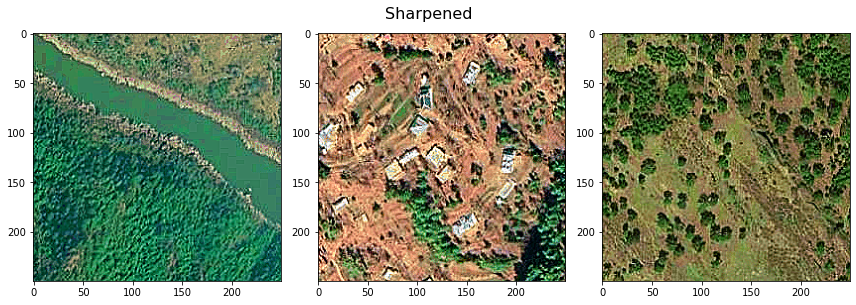

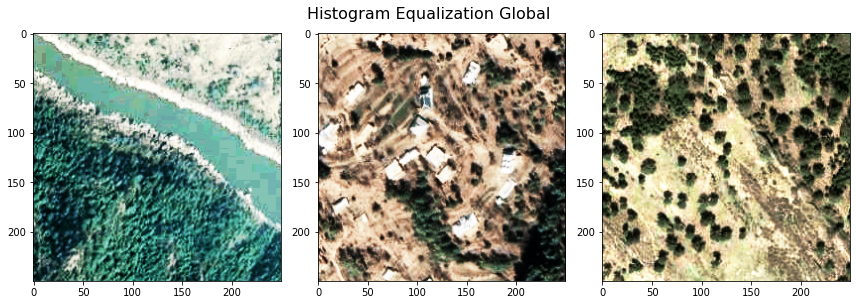

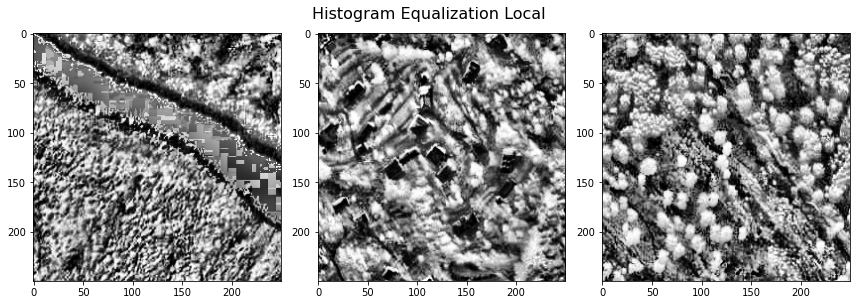

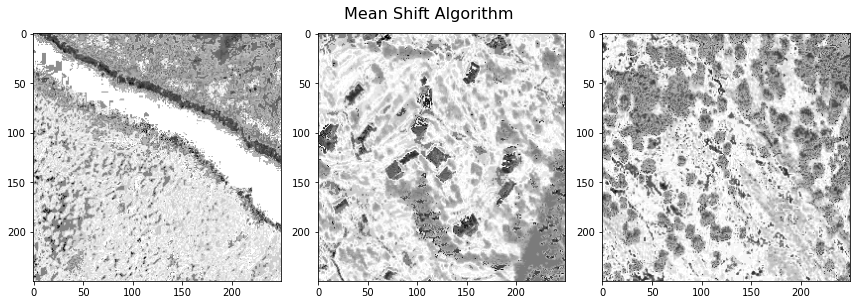

In [38]:
for key, value in img_data.items():
    if key in ["Gray", "Roberts", "Histogram Equalization Local", "Mean Shift Algorithm"]:
        plot_images(value[0], value[1], value[2], binary=True, title=key)
    else:
        plot_images(value[0], value[1], value[2], title=key)